In [10]:
#We'll be using LSTM (Long Short-Term Memory network)- "type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account."
#feb 2nd 2017 to feb 2nd 2019

#Libraries and data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#Read data
apple_training_complete=pd.read_csv('trainingAAPL.csv')

In [28]:
#Explore data
apple_training_complete.head()
apple_training_complete.describe()
apple_training_complete.shape

(1511, 7)

In [29]:
#We only care about the opening prices
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [30]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #scale the data between 0 and 1
apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [31]:
#predicting the opening stock prices based on the opening stock prices for the past 60 days
"the feature set should contain the opening stock price values for the past 60 days"
"the label (dependent var.) should be the stock price at the 61st day"
features_set = []
labels = []
for i in range(60, 1511): #the data has 1510 records
    features_set.append(apple_training_scaled[i-60:i, 0]) #loop that starts from 61st record and stores all the previous 60 records to the feature_set list"
    labels.append(apple_training_scaled[i, 0]) #the 61st record is stored in the labels list

features_set, labels = np.array(features_set), np.array(labels)  #convert to numpy array
#LSTM required a 3 dimension format so we'll convert ours
#first dimension is the number of records or rows (1511 here)
#second dimension is the number of time steps (60 here)
#third dimension is the number of indicators (we are only using 1 feature - open, so 1 indicator)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [32]:
#Define the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential() #the model class. We will add LSTM, Dropout and Dense layers to this model.

#Creating LSTM and Dropout Layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1))) #use add() to add a layer
"The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter" \
" is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_" \
"shape is the number of time steps while the last parameter is the number of indicators."

#Adding a dropout layer to our model (to avoid over-fitting)
model.add(Dropout(0.2))

#Adding three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Creating Dense Layer
"To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer" \
" will be set to 1 since we want to predict a single value in the output"
model.add(Dense(units = 1))

In [33]:
#Compile the LSTM
#adam optimizer to reduce the loss or to optimize the algorithm
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #mean squared error as loss function

In [34]:
#Training
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1451/1451 [==============================] - 11s 7ms/step - loss: 0.0281
Epoch 2/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0044
Epoch 3/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0036
Epoch 4/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0034
Epoch 5/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0035
Epoch 6/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0042
Epoch 7/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0030
Epoch 8/100
1451/1451 [==============================] - 8s 6ms/step - loss: 0.0027
Epoch 9/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0028
Epoch 10/100
1451/1451 [==============================] - 8s 5ms/step - loss: 0.0027
Epoch 11/100
1451/1451 [==============================] - 7s 5ms/step - loss: 0.0026
Epoch 12/100
1451/1451 [==============================] - 8s 6ms/step - l

In [37]:
#Testing
#Importing the testing data
apple_testing_complete = pd.read_csv('testingAAPL.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [38]:
#Converting Test Data to Right Format
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [39]:
#Scaling
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [40]:
#Prepating the testing data
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [41]:
#Convert to 3 dimensions
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [42]:
#Predictions
predictions = model.predict(test_features)

"Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values."
predictions = scaler.inverse_transform(predictions)

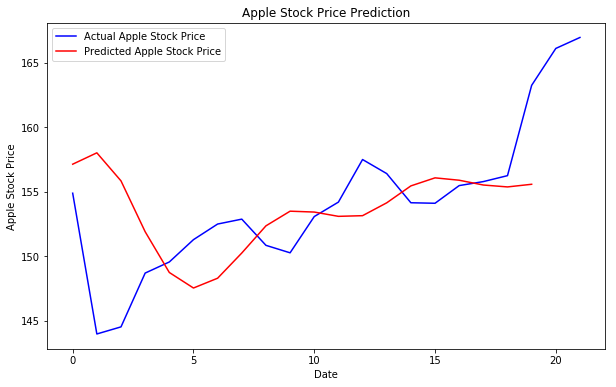

In [43]:
#Plotting
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()